<a href="https://colab.research.google.com/github/akatjizeu/Data-Science/blob/main/deakin-bridging/business-stats/ENews_Express_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

The executives at E-news express believe that the current website might not be attracting new subscribers as much as the old one has been doing due to its design.

**The Objectives**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:


    1. Do the users spend more time on the new landing page than on the existing landing page?
    2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
    3. Does the converted status depend on the preferred language?
    4. Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [2]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 numpy==1.25.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency, f_oneway



## Reading the Data into a DataFrame

In [4]:
data = pd.read_csv('abtest.csv')
data.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* There are 4 object variables(**group, landing_page, converted, langague_preferred**) in our dataset and only one usable integer variable(**time_spent_on_the_page**)
* The **user_id** column is just an identifier it has no significant value in our problem resolution efforts, so we will drop it.

In [6]:
#Dropping the user_id column
data.drop('user_id', axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   group                   100 non-null    object 
 1   landing_page            100 non-null    object 
 2   time_spent_on_the_page  100 non-null    float64
 3   converted               100 non-null    object 
 4   language_preferred      100 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


* We have 1 integer variable and 4 object type variables which we will establish what dataset best suits tehir description better after further analysis of the data

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [8]:
#Viewing the first and last 5 rows
pd.concat([data.head(), data.tail()])

,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,control,old,3.48,no,Spanish
1,treatment,new,7.13,yes,English
2,treatment,new,4.40,no,Spanish
3,control,old,3.02,no,French
4,treatment,new,4.75,yes,Spanish
95,treatment,new,5.15,no,Spanish
96,control,old,6.52,yes,English
97,treatment,new,7.07,yes,Spanish
98,treatment,new,6.20,yes,Spanish
99,treatment,new,5.86,yes,English


* The object variables are all categorical, so we will have to convert them to categorical


In [9]:
#Converting object variables to categrical
data['group'] = data['group'].astype('category')
data['landing_page'] = data['landing_page'].astype('category')
data['converted'] = data['converted'].astype('category')
data['language_preferred'] = data['language_preferred'].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   group                   100 non-null    category
 1   landing_page            100 non-null    category
 2   time_spent_on_the_page  100 non-null    float64 
 3   converted               100 non-null    category
 4   language_preferred      100 non-null    category
dtypes: category(4), float64(1)
memory usage: 1.8 KB


* We now have one continous variable and 4 categorical variables in our dataset

In [11]:
#Checking the shape of the dataset
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset')

There are 100 rows and 5 columns in the dataset


In [12]:
#Getting the statistical summary of the continous (numerical) variable
data.describe(include=[np.number])

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


* There are no mossing values for **user_id** and **time_spent_on_the_page**  as the count for each of the columns is 100
* The average time a user spent on the landing page is 5 minutes 37 seconds.
* The maximum time a user spent on the landing page is approximately 11 minutes
* The minimum time a user spen on the landing page is 0.19 seconds
* The mean and the 50th percentile(median) are almost equal which might suggest a normal distribution of **time_spent_on_the_page**

In [13]:
#Getting the statistical summary of the categorical variables
data.describe(include=['category'])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,new,yes,French
freq,50,50,54,34


* We do not to have missing values in the all the categorical variables
* There are 2 categories of each of the following columns (**group, landing_page and converted**) and 3 categories for **language_preferred**
* On the converted variable, *'yes'* is the most frequent while *'spanish'* is the most preferred language

In [14]:
#Checking for missing values
data.isnull().sum()

,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


* There are no missing values in the dataset

In [15]:
#Checking for duplicates
data.duplicated().sum()

np.int64(0)

* There are no duplicates in the dataset

### Univariate Analysis

In [76]:
def univariate_analysis(data, column_name):
    """
    Displays a boxplot and histplot for a given numerical variable side by side.

    Args:
        data: pandas DataFrame
        column_name: name of the numerical column to analyze
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Boxplot
    sns.boxplot(x=data[column_name], ax=axes[0])
    axes[0].set_title(f'Boxplot of {column_name}')
    axes[0].set_xlabel(column_name)

    # Histplot
    sns.histplot(data=data, x=column_name, ax=axes[1], kde=True)
    axes[1].set_title(f'Histplot of {column_name}')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [96]:
def categorical_analysis(data, column_name):
    """
    Displays value counts and a countplot for a given categorical variable side by side.

    Args:
        data: pandas DataFrame
        column_name: name of the categorical column to analyze
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Value counts
    counts = data[column_name].value_counts()
    counts.plot(kind='bar', ax=axes[0])
    axes[0].set_title(f'Value Counts of {column_name}')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Frequency')

    # Add text annotations to the bar plot
    for i, count in enumerate(counts):
        axes[0].text(i, count, str(count), ha='center', va='bottom', color='black')


    # Countplot
    sns.countplot(x=column_name, data=data, ax=axes[1])
    axes[1].set_title(f'Countplot of {column_name}')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    #print(data[column_name].value_counts())

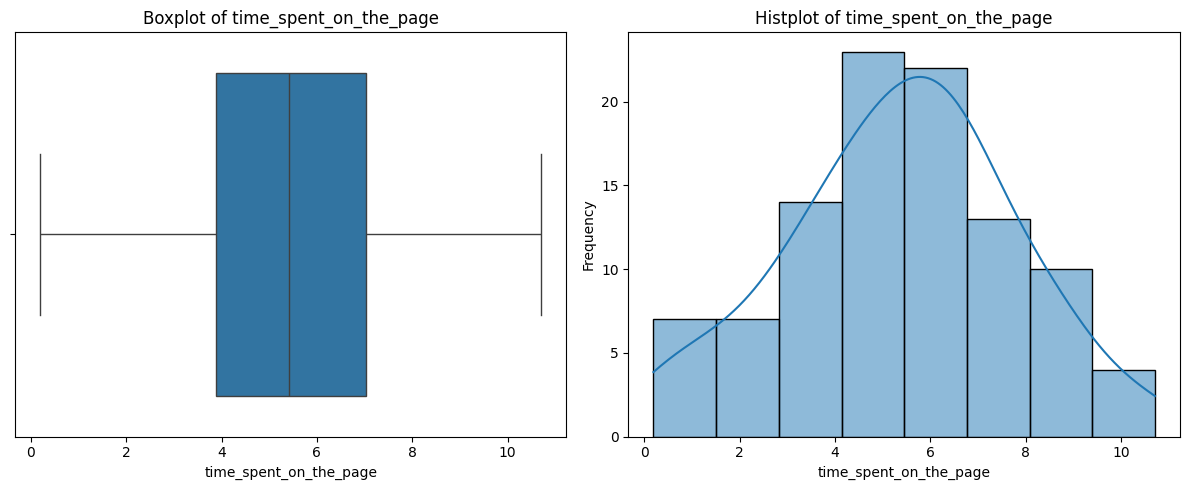

In [77]:
#Univariate analysis for time_spent_on_the_page using a distribution graph
univariate_analysis(data, 'time_spent_on_the_page')

* The distribution shows an almost normal distributiton for this column


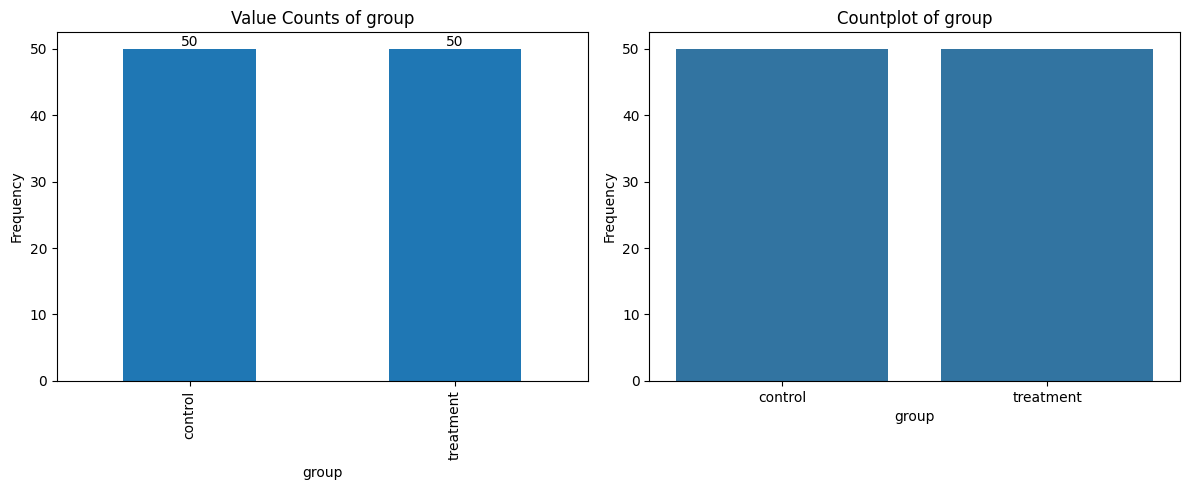

In [97]:
categorical_analysis(data, 'group')

* There is an equal number of users for each of the control and treatment groups

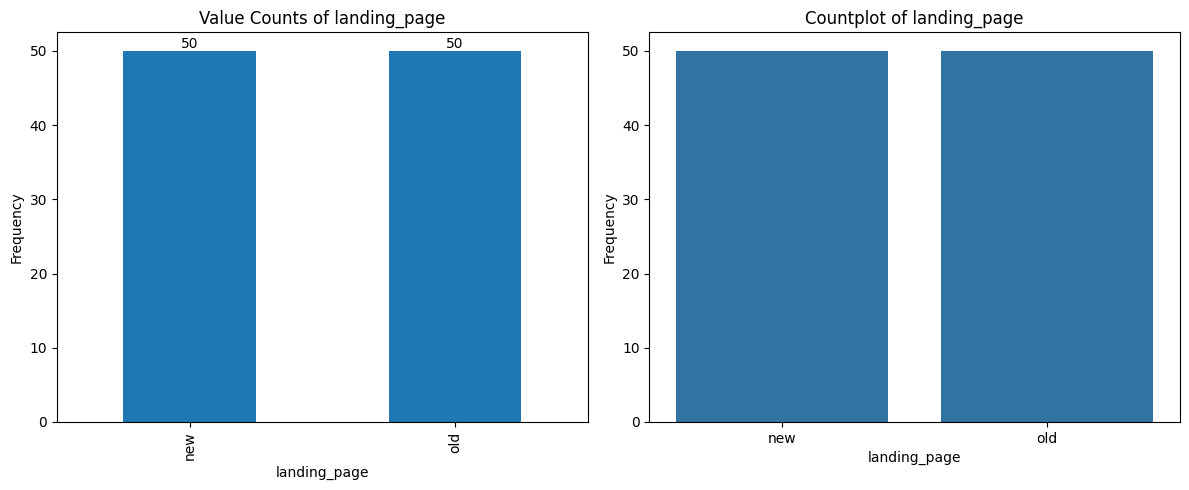

In [98]:
categorical_analysis(data, 'landing_page')

* The is an equal distribution of users in each of the new and old pages

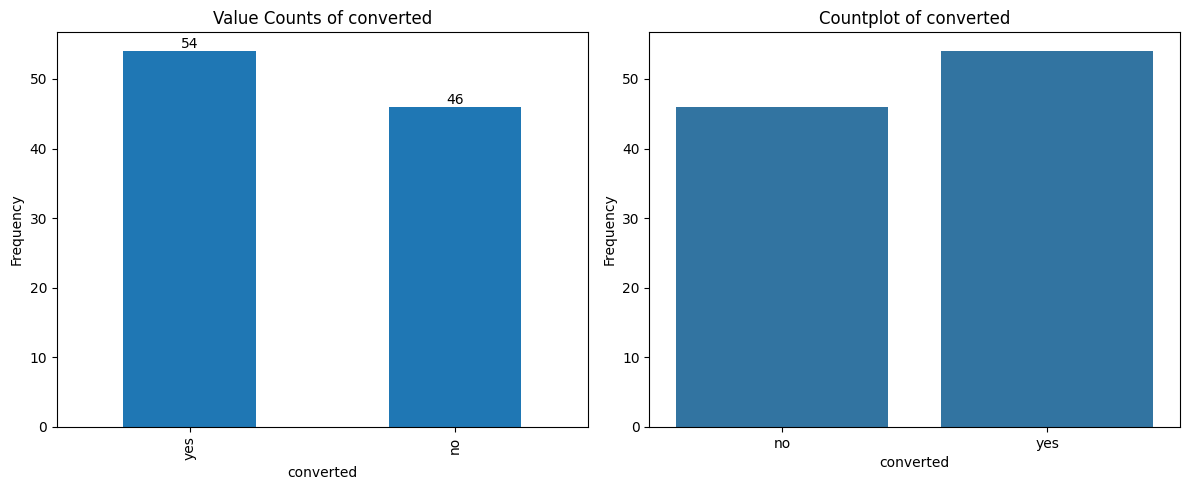

In [99]:
categorical_analysis(data, 'converted')

* Users who converted are more than those who did not convert

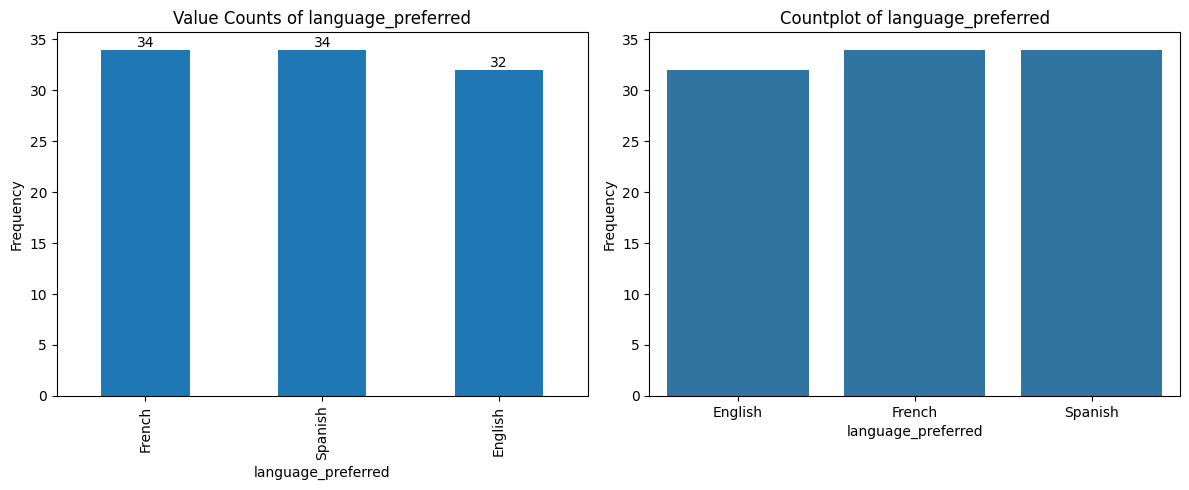

In [100]:
categorical_analysis(data, 'language_preferred')

* There is an equal number of users who prefer spanish and French
* Fewer users prefer English

### Bivariate Analysis

In [83]:
def bivariate_analysis(data, cat_variable, num_variable):
    """
    Displays a boxplot to compare a continuous variable across different categories
    of a categorical variable.

    Args:
        data: pandas DataFrame
        cat_variable: name of the categorical column
        num_variable: name of the numerical column
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cat_variable, y=num_variable, data=data)
    plt.xlabel(cat_variable.capitalize())
    plt.ylabel(num_variable.capitalize())
    plt.title(f'{num_variable.capitalize()} by {cat_variable.capitalize()}');
    plt.show()

In [88]:
def categorical_comparison(data, cat_variable1, cat_variable2):
    """
    Displays two countplots side by side to compare two categorical variables.

    Args:
        data: pandas DataFrame
        cat_variable1: name of the first categorical column
        cat_variable2: name of the second categorical column
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Countplot 1
    sns.countplot(x=cat_variable1, hue=cat_variable2, data=data, ax=axes[0])
    axes[0].set_xlabel(cat_variable1.capitalize())
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'Distribution of {cat_variable1.capitalize()} by {cat_variable2.capitalize()}');

    # Countplot 2
    sns.countplot(x=cat_variable2, hue=cat_variable1, data=data, ax=axes[1])
    axes[1].set_xlabel(cat_variable2.capitalize())
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(f'Distribution of {cat_variable2.capitalize()} by {cat_variable1.capitalize()}');

    plt.tight_layout()
    plt.show()

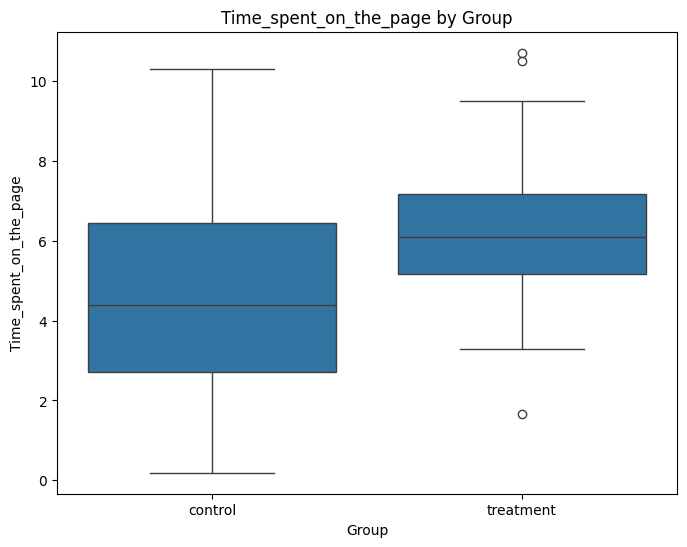

In [84]:
bivariate_analysis(data, 'group', 'time_spent_on_the_page')

*

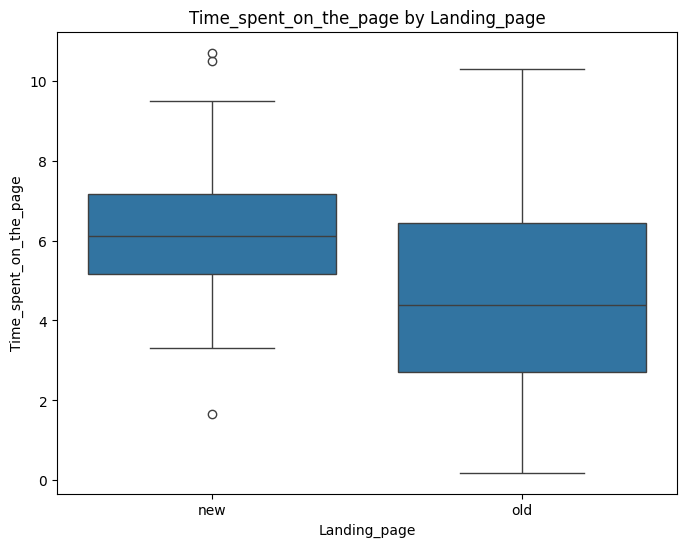

In [85]:
bivariate_analysis(data, 'landing_page', 'time_spent_on_the_page')

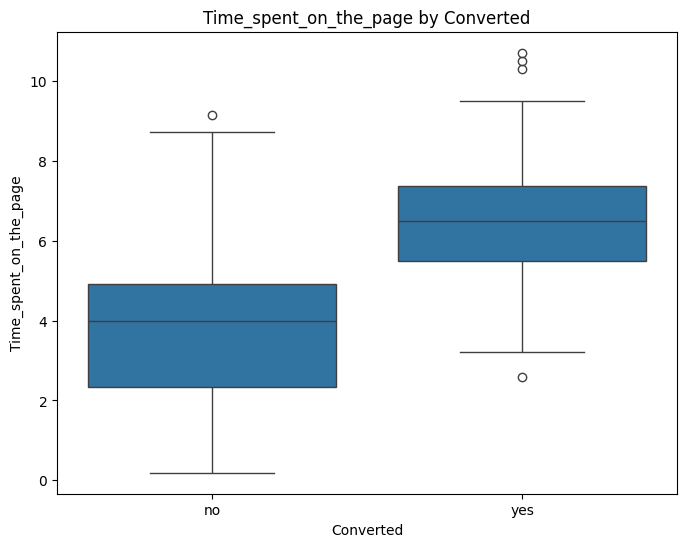

In [86]:
bivariate_analysis(data, 'converted', 'time_spent_on_the_page')

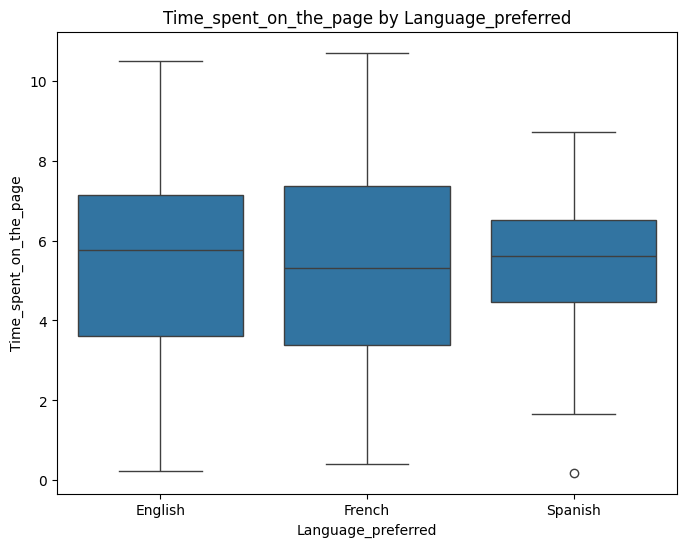

In [87]:
bivariate_analysis(data, 'language_preferred', 'time_spent_on_the_page')

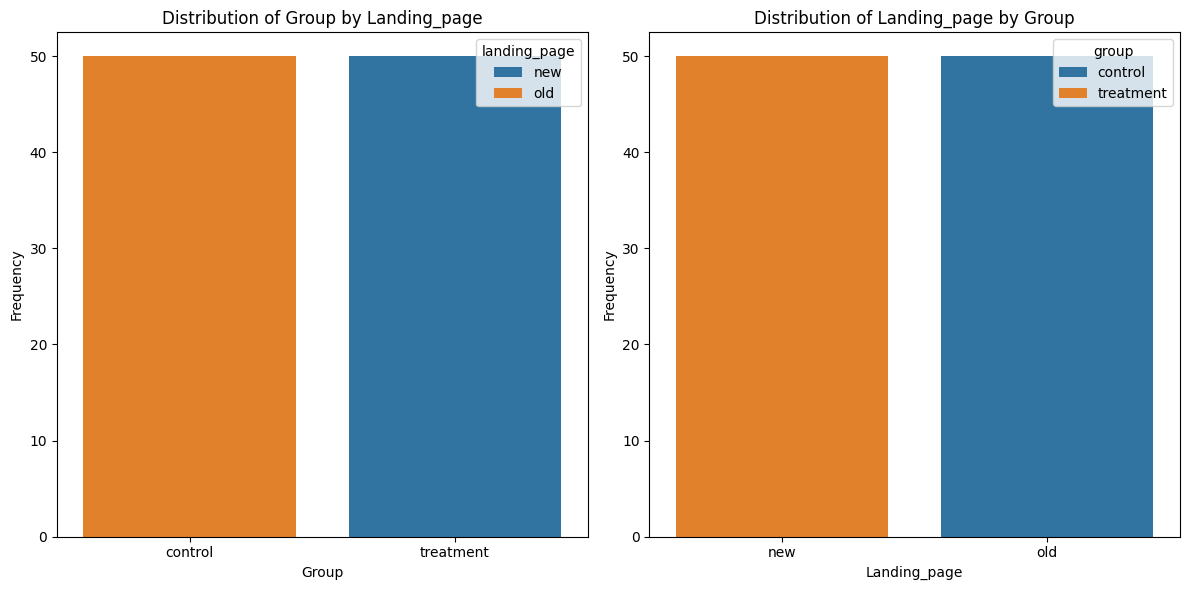

In [89]:
categorical_comparison(data, 'group', 'landing_page')

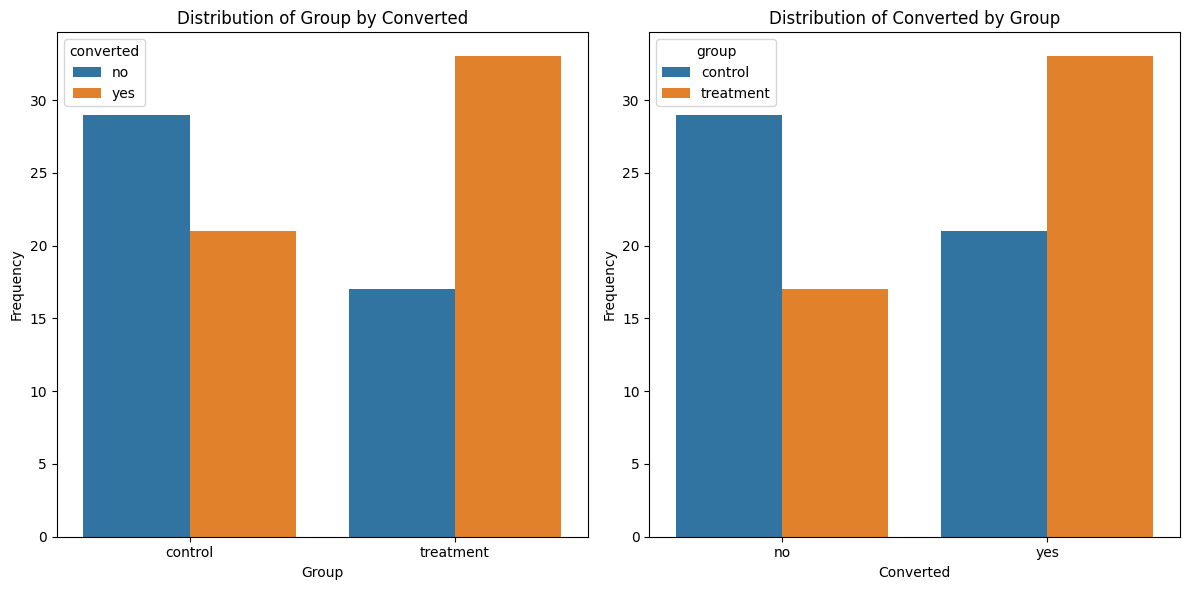

In [90]:
categorical_comparison(data, 'group', 'converted')

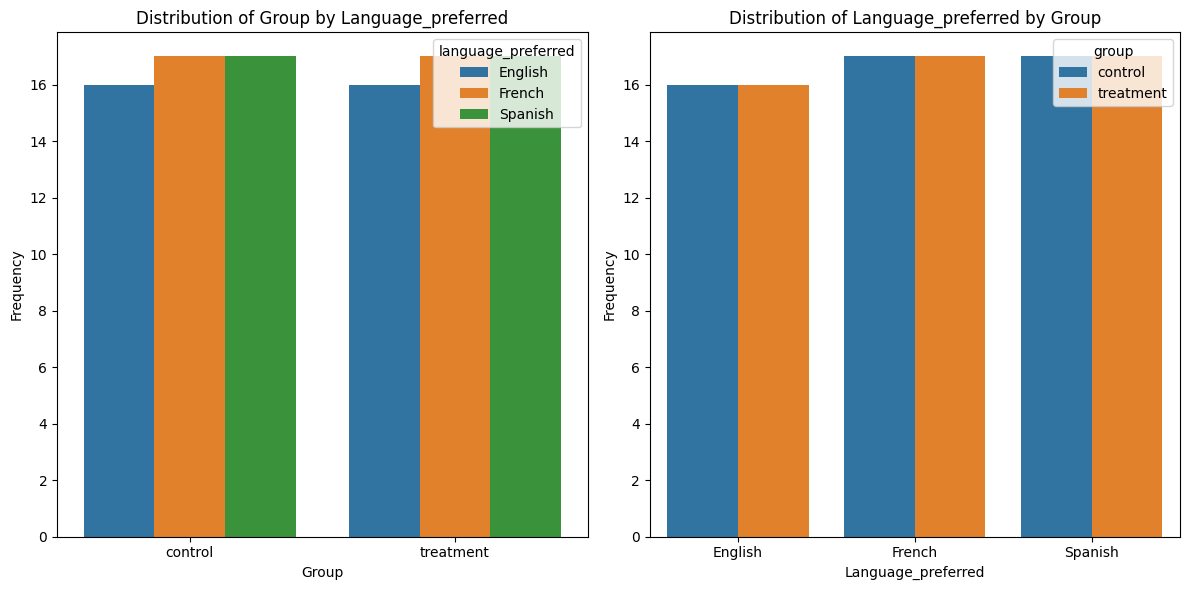

In [91]:
categorical_comparison(data, 'group', 'language_preferred')

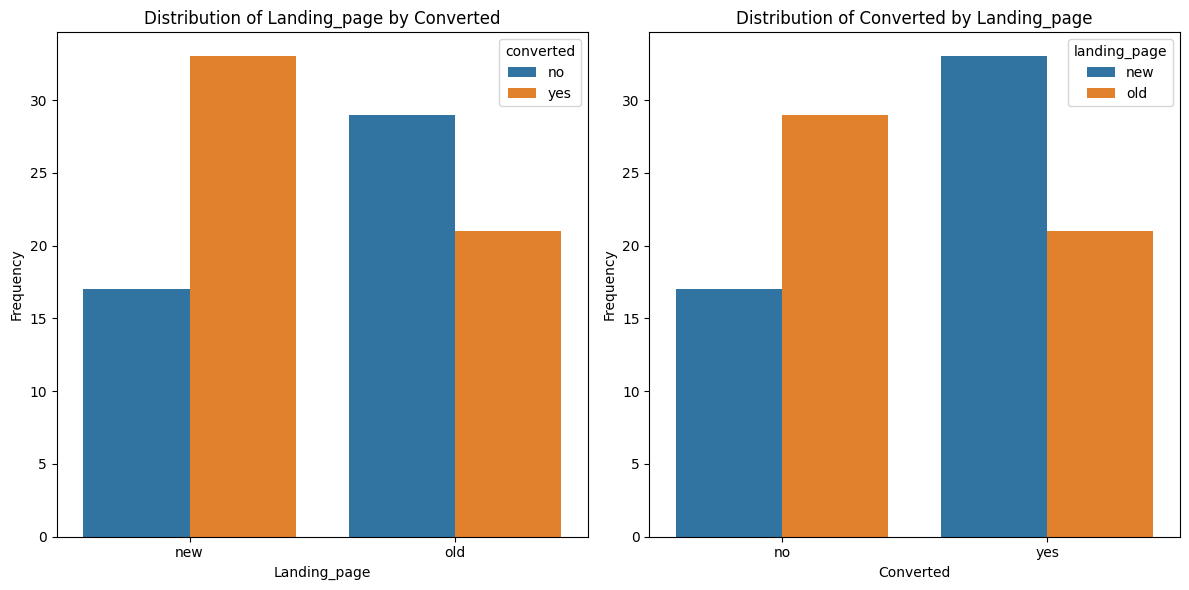

In [92]:
categorical_comparison(data, 'landing_page', 'converted')

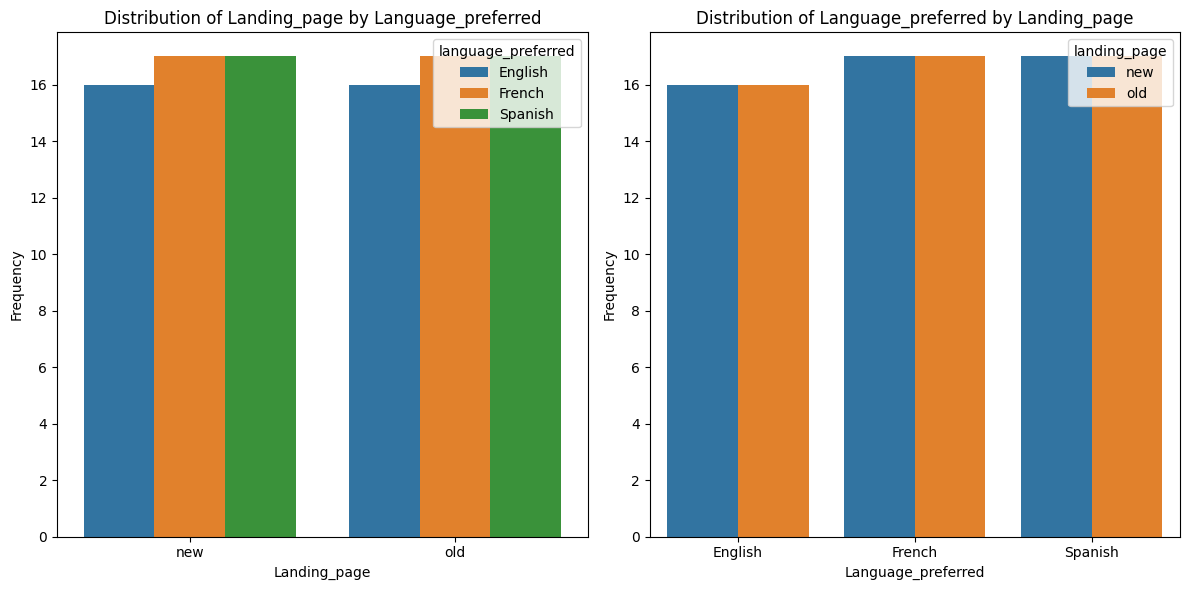

In [93]:
categorical_comparison(data, 'landing_page', 'language_preferred')

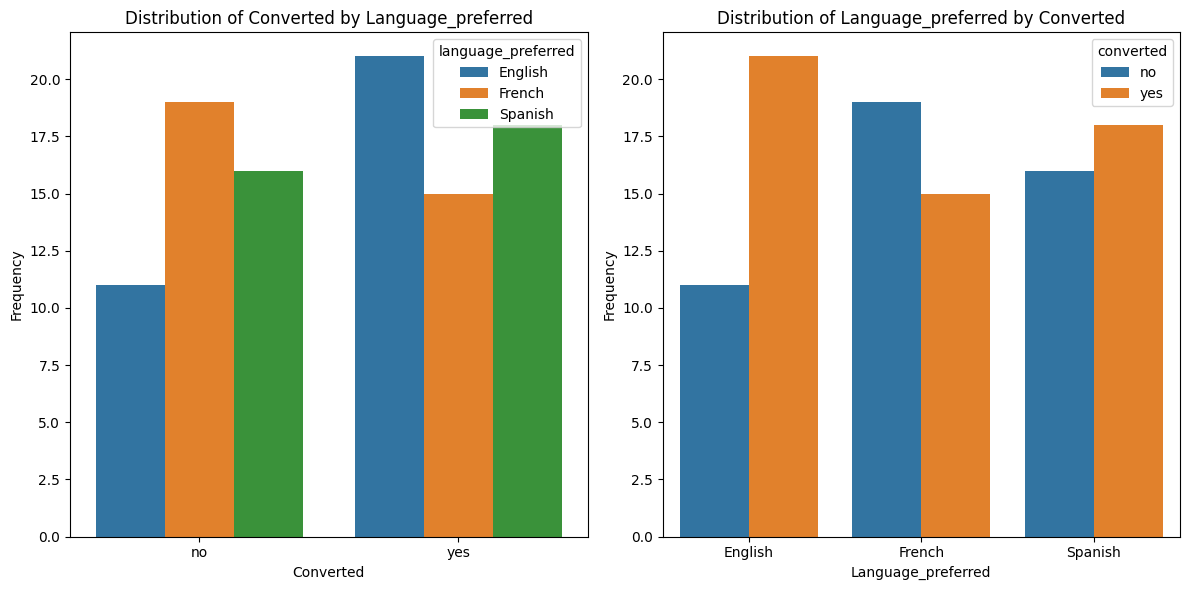

In [94]:
categorical_comparison(data, 'converted', 'language_preferred')

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

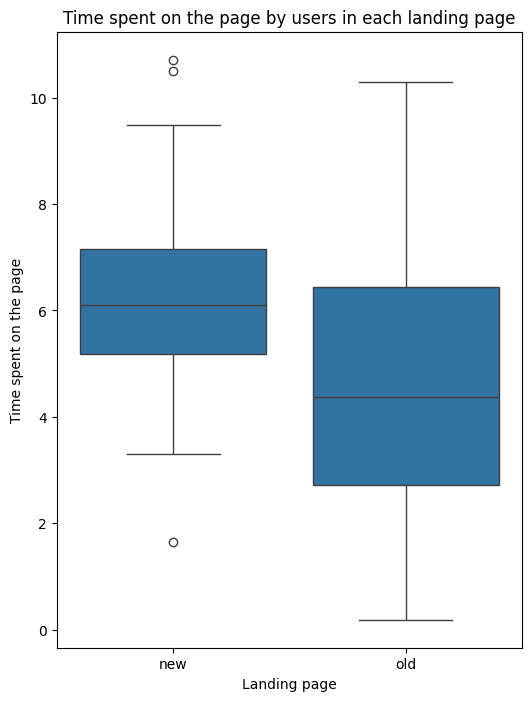

In [26]:
# Time spent on each landing page
plt.figure(figsize=(6, 8))
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=data)
plt.xlabel('Landing page')
plt.ylabel('Time spent on the page')
plt.title('Time spent on the page by users in each landing page');

* There are outliers on the new landing page on both the upper and lower side of the IQR
* The range of the time spent is more on the old than the new landing page
* The median of the old page is much lower than that of the new landing page
*

### Step 1: Define the null and alternate hypotheses

The null hypothesis is:
>$H_0$: The avergae time spent on the new landing page is at most equal to the avergae time spent on the old landing page.

and the alternate hypothesis is:

>$H_a$: The avergae time spent on the new landing page is greater than the avergae time spent on the old landing page.

Let  $\mu_n$ be the mean time spent on the new landing page and  $\mu_o$ be the mean time spent on the old landing page

Therefore:

>$H_0$: $\mu_n$ <= $\mu_o$

>$H_a$: $\mu_n$ > $\mu_o$


### Step 2: Select Appropriate test

We are going to perform a one tailed test for two populations means from two independent populations with unknown standard deviations.

The appropriate test is:
>**2-sample independent t-test**

### Step 3: Decide the significance level

The significance leve we will adopt is:
>**$\alpha$ = 0.05**

### Step 4: Collect and prepare data

In [27]:
#Get the two seperate sample data from the dataset
time_spent_on_new = data[data['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_on_old = data[data['landing_page'] == 'old']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [31]:
#Calculate the 2-sample independent t-test of the sample data
t_statistic, p_value = stats.ttest_ind(time_spent_on_new, time_spent_on_old, equal_var=False, alternative='greater')
print(f'The test statistic is: {t_statistic}\nThe p-value is: {p_value}')

The test statistic is: 3.7867702694199856
The p-value is: 0.0001392381225166549


In [34]:
# Claculate the critical value
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha, df=len(time_spent_on_new) + len(time_spent_on_old) - 2)
print(f'The critical value is: {t_critical}')

The critical value is: 1.6605512170440568


### Step 6: Compare the p-value with $\alpha$

In [33]:
# Compare the p-value with the \alpha
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


In [35]:
# Determine the conclusion using the critical value t_critical
if t_statistic > t_critical:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


### Step 7:  Draw inference

By rejecting the null hypothesis we have enough statistical evidence to say the time spent by users on the new landing page is greater than the time spent by users on the old landing page

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

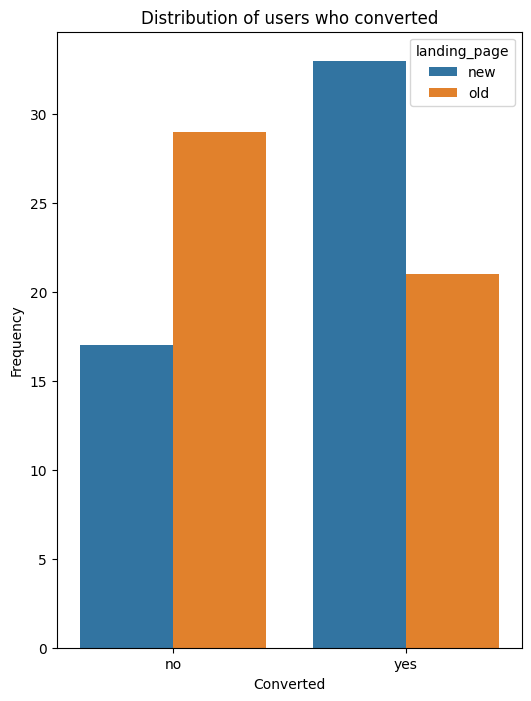

In [36]:
# Visualize the conversion vs landing page
plt.figure(figsize=(6, 8))
sns.countplot(x='converted', hue='landing_page', data=data)
plt.xlabel('Converted')
plt.ylabel('Frequency')
plt.title('Distribution of users who converted');

* The proportion of users who converted in the new landing page is greater than those who converted in the old page
* The proportion of those who did not convert is high on the old page than the new landing page

### Step 1: Define the null and alternate hypotheses

The null hypothesis is:
>$H_0$: The proprtion of the conversion rate for the new page is equal to the the proprtion of the conversion rate for the old page

and the alternate hypothesis is:

>$H_a$: The proprtion of the conversion rate for the new page greater than the proprtion of the conversion rate for the old page

Let  $p_n$ be the conversion proportion for the new landing page and  $p_o$ be the conversion proportion for the old landing page

Therefore:

>$H_0$: $p_n$ = $p_o$

>$H_a$: $p_n$ > $p_o$


### Step 2: Select Appropriate test

We are going to perform a one tailed test to compare the sample proportions from two populations.

The appropriate test is:
>**2-sample z-test**

1. The data are simple random values from both the populations
2. Both populations follow a binomial distribution
3. Samples are independent of each other
4. Test results are accurate when np and n(1-p) are greater than 5


### Step 3: Decide the significance level

The significance leve we will adopt is:
>**$\alpha$ = 0.05**

### Step 4: Collect and prepare data

In [38]:
# The number of subscribers who converted in the new landing page
n_new = data[(data['landing_page'] == 'new') & (data['converted'] == 'yes')].shape[0]

# The number of subscribers who converted in the old landing page
n_old = data[(data['landing_page'] == 'old') & (data['converted'] == 'yes')].shape[0]
print(f'The number of subscribers who converted in the new landing page is {n_new}\nThe number of subscribers who converted in the old landing page is {n_old}')

# The total number of subscribers in the new page
n_total_new = data[data['landing_page'] == 'new'].shape[0]

# The total number of subscribers in the old page
n_total_old = data[data['landing_page'] == 'old'].shape[0]

print('The total number of subscribers in the new and old landing pages are {0} and {1} respectively'.format(n_total_new,n_total_old))

#Print the conversion rate of each
print(f'The conversion rate for the new landing page is {n_new/n_total_new}\nThe conversion rate for the old landing page is {n_old/n_total_old}')

The number of subscribers who converted in the new landing page is 33
The number of subscribers who converted in the old landing page is 21
The total number of subscribers in the new and old landing pages are 50 and 50 respectively
The conversion rate for the new landing page is 0.66
The conversion rate for the old landing page is 0.42


### Step 5: Calculate the p-value

In [45]:
#Calcution of the p-value using 2 sample z-test
z_statistic, p_value = proportions_ztest([n_new, n_old] , [n_total_new, n_total_old], alternative = 'larger')
print(f'The test statistic is: {z_statistic}\nThe p-value is: {p_value}')

The test statistic is: 2.4077170617153842
The p-value is: 0.008026308204056278


In [46]:
#Calculation of the critical value
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)
print(f'The critical value is: {z_critical}')

The critical value is: 1.6448536269514722


### Step 6: Compare the p-value with $\alpha$

In [47]:
# Compare the p-value with alpha
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


### Step 7:  Draw inference

The p-value (≈ 0.008) is less than the level of significance (0.05), we therefore, reject the null hypothesis.

At a 5% significance level, we conclude that we have enough statistical evidence to say that the proportion of users visiting the new page and getting converted is greater than the proportion of users visiting the old page and getting converted.


## 3. Is the conversion and preferred language are independent or related?

### Perform visual analysis

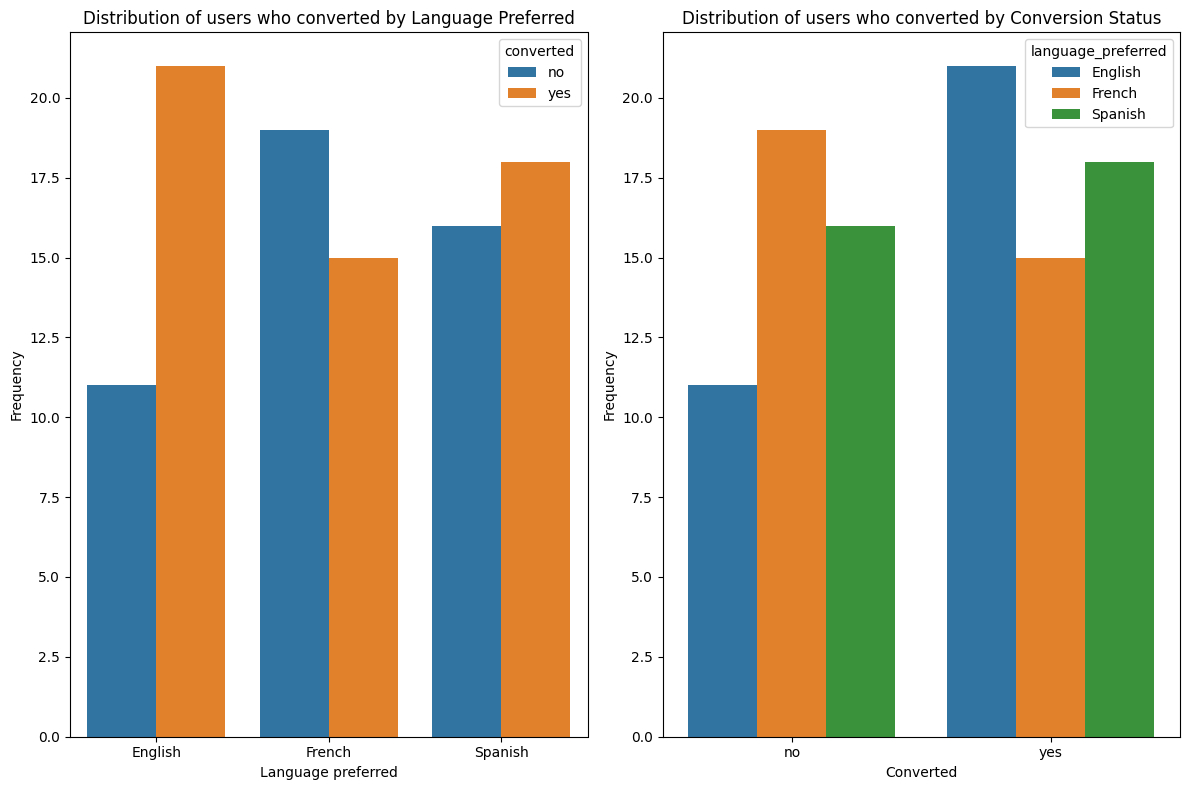

In [52]:
# PErform all the visuals for preferred language vs conversion
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.countplot(x='language_preferred', hue='converted', data=data, ax=axes[0])
axes[0].set_xlabel('Language preferred')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of users who converted by Language Preferred');

#Draw another visual
sns.countplot(x='converted', hue='language_preferred', data=data, ax=axes[1])
axes[1].set_xlabel('Converted')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of users who converted by Conversion Status');

plt.tight_layout()
plt.show()

In [55]:
pd.crosstab(data.language_preferred,data.converted,margins=True)

converted,no,yes,All
language_preferred,,,
English,11,21,32
French,19,15,34
Spanish,16,18,34
All,46,54,100


### Step 1: Define the null and alternate hypothesis

The null and alternative hypotheses can be formulated as:

>$H_0$: Converted status is independent of language preferred.

>$H_a$: Converted status is NOT independent of language preferred.

### Step 2: Select Appropriate test

The formulated hypotheses can be tested using a:

>**Chi-square test of independence **

of attributes, concerning the two categorical variables, language of preference (Spanish/English/French) and conversion status (yes/no)

Are assumptions to perform the Chi-square test of independence satisfied ?
1. Categorical variables - Yes
2. Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
3. Random sampling from the population - Yes


### Step 3: Decide the significance level

The significance leve we will adopt is:
>**$\alpha$ = 0.05**

### Step 4: Collect and prepare data

In [56]:
#Create a contigency table to perform this test
contingency_table = pd.crosstab(data.language_preferred,data.converted)
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [58]:
#Calcution of the p-value using chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'The test statistic is: {chi2}\nThe p-value is: {p_value}')

The test statistic is: 3.0930306905370832
The p-value is: 0.2129888748754345


In [59]:
#Calculation of the critical value
alpha = 0.05
chi2_critical = stats.chi2.ppf(1 - alpha, df=2)
print(f'The critical value is: {chi2_critical}')

The critical value is: 5.991464547107979


### Step 6: Compare the p-value with $\alpha$

In [60]:
# Compare the p-value with alpha
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


In [61]:
# Draw conclusion using the critical value
if chi2 > chi2_critical:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


### Step 7:  Draw inference

The p-value (≈ 0.212) is greater than the level of significance (0.05) and we, therefore, fail to reject the null hypothesis.

At a 5% significance level, we conclude that we have enough statistical evidence to say that the converted status is independent of the language preferred.

## 4. Is the time spent on the new page same for the different language users?

### Perform visual analysis

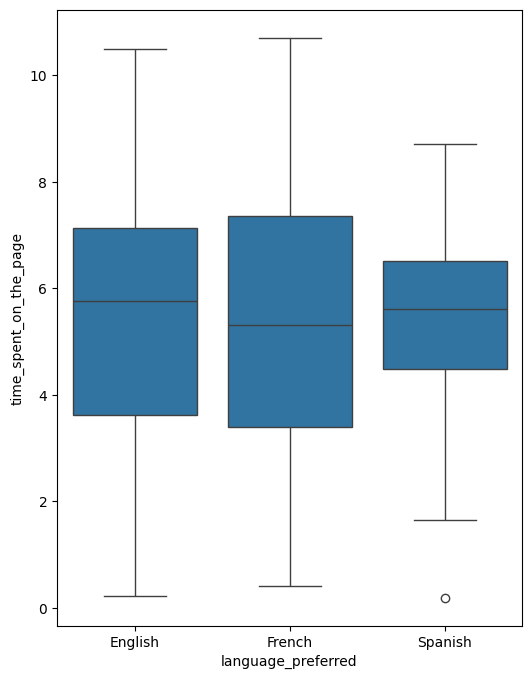

In [68]:
# Visuals for time spent for different language users

#Time spent by language preferred
plt.figure(figsize=(6, 8))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=data)
plt.show();

In [69]:
data['language_preferred'].value_counts()

,count
language_preferred,
French,34
Spanish,34
English,32


### Step 1: Define the null and alternate hypothesis

The null and alternative hypotheses can be formulated as:

>$H_0$: The mean time spent on the new landing page for all three languages are all equal.

against the alternate hypothesis

>$H_a$: The mean time spent on the new landing page for at least one of the three languages is different.

Let $\mu_1$, $\mu_2$, $\mu_3$ be the means of time spent on the new landing page for language preferences Spanish, French, and English respectively.

Mathematically, the above-formulated hypotheses can be written as:
>$H_0$: $\mu_1$ = $\mu_2$ = $\mu_3$

against the alternative hypothesis
>$H_a$: At least one-time average of the new landing page is different among the language preferences.

### Step 2: Select Appropriate test

The test is concerned with comparing the means of more than two groups.

>A One-way ANOVA F-test

would be an appropriate test to perform.
Let's test whether the assumptions are satisfied or not

  1. Normality: The dependent variable should be normally distributed within each group.
  2. Independence: The observations should be independent and not related to each other.
  3. Equal variances: The variances of the dependent variable should be equal across all groups.

If the assumptions are met, ANOVA can be used to test the null hypothesis.



### Step 3: Decide the significance level

The significance leve we will adopt is:
>**$\alpha$ = 0.05**

### Step 4: Collect and prepare data

In [70]:
# create separate variables to store the time spent on new page with respect to users preferring English, Spanish and French as language
time_spent_on_new_english = data[(data['language_preferred'] == 'English') & (data['landing_page'] == 'new')]['time_spent_on_the_page']
time_spent_on_new_spanish = data[(data['language_preferred'] == 'Spanish') & (data['landing_page'] == 'new')]['time_spent_on_the_page']
time_spent_on_new_french = data[(data['language_preferred'] == 'French') & (data['landing_page'] == 'new')]['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [72]:
#Calcution of the p-value using  f_oneway
f_statistic, p_value = stats.f_oneway(time_spent_on_new_english, time_spent_on_new_spanish, time_spent_on_new_french)
print(f'The test statistic is: {f_statistic}\nThe p-value is: {p_value}')

The test statistic is: 0.854399277000682
The p-value is: 0.43204138694325955


In [73]:
#Calculation of the critical value
alpha = 0.05
f_critical = stats.f.ppf(1 - alpha, dfn=2, dfd=len(time_spent_on_new_english) + len(time_spent_on_new_spanish) + len(time_spent_on_new_french) - 3)
print(f'The critical value is: {f_critical}')

The critical value is: 3.195056280737215


### Step 6: Compare the p-value with $\alpha$

In [74]:
# Compare the p-value with alpha
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


In [75]:
#Compare using the critical value
if f_statistic > f_critical:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


### Step 7:  Draw inference

The p-value (≈ 0.432) is greater than the level of significance (0.05), we therefore, fail to reject the null hypothesis.

Hence, we do not have enough statistical significance to conclude that the average time spent on the new landing page is different for users with different language preferences at the 5% significance level.


## Conclusion and Business Recommendations

___